# Introduction to Root Locus Design

In this section we will engage in a short exploration of compensator design in the time domain with a look at root-locus design of a velocity-feedback compensator for a simple "double integrator" system. This serves as an introduction to the topic of phase lead compensation which is used to improve transient performance and relative stability.

## Gain compensation

First design example (Satellite Attitude Control). The system may be represented 
in block diagram form as shown in Figure 1. (Simulink model: [satellite.slx](satellite.slx))

![Satellite control with gain modulated torque](images/velfb_fig1.png)

**Figure 1 Satellite control with gain modulated torque**

For this system the plant transfer function is 

$$G(s) = \frac{1}{s^2}$$
 
Feedback: 
 
$$H(s) = 1$$

Controller: 
 
$$D(s) = K$$
 
The root locus equation is:
 
$$1 + KG(s)H(s) = 0$$
 
with root locus parameter = $K$.
 

Defining the problem in Matlab

In [ ]:
G = tf(1,conv([1,0],[1,0]));
H = tf(1,1);
Go = G*H

*Note*: The root locus gain $K$ is implied in Matlab (it does not need to be defined)

In [ ]:
rlocus(Go),title('Root locus diagram for gain modulated satellite attitude control')

Pick off an arbitrary gain

In [5]:
[K]=rlocfind(Go,3/4j)


K =

    0.5625



Closed-loop transfer function

In [ ]:
Gc = feedback(K*G,H);

$$G_c(s) = \frac{0.5625}{s^s + 0.5625}$$

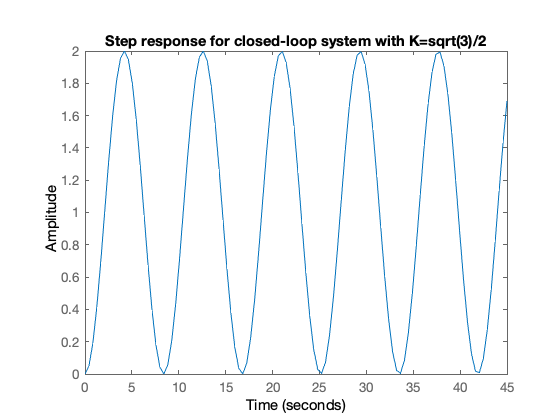

In [11]:
step(Gc,45),title('Step response for closed-loop system with K=sqrt(3)/2')

## With velocity feedback,

The block diagram becomes that shown in Figure 2 (Simulink model: [velfb.slx](velfb.slx)). 

The root locus equation is

$$1 + \frac{KK_T(s + 1/K_T)}{s^2} = 0$$

where $KK_T$ is the root locus gain.
 
![System with velocity feedback](images/velfb_fig2.png)
 
**Figure 2 System with velocity feedback**

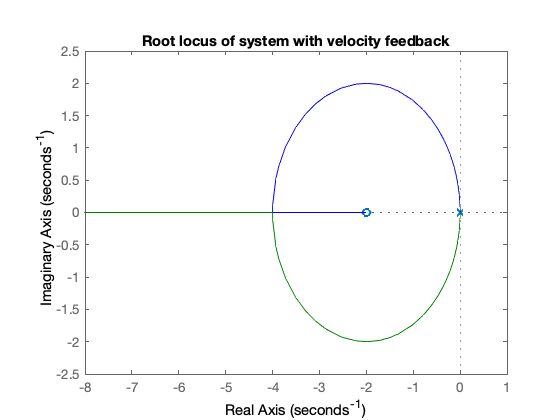

In [7]:
Kt = 0.5;
Go2=tf(Kt*[1, 1/Kt],[1,0,0]);
rlocus(Go2),title('Root locus of system with velocity feedback')

## Closed-loop step response
 
$$G_o(s)=\frac{1}{s}\times \frac{K/s}{1 + (KK_T)/s}$$
 
$$G_o(s)= \frac{K}{s(s + KK_T)}$$
 
$$G_c(s) = \frac{K}{s^2 + KK_T s + K}$$

In [12]:
Integrator=tf(1,[1,0]);
G1=feedback(K*Integrator,Kt)*Integrator;
Gc2=feedback(G1,1)


Gc2 =
 
        8
  -------------
  s^2 + 4 s + 8
 
Continuous-time transfer function.



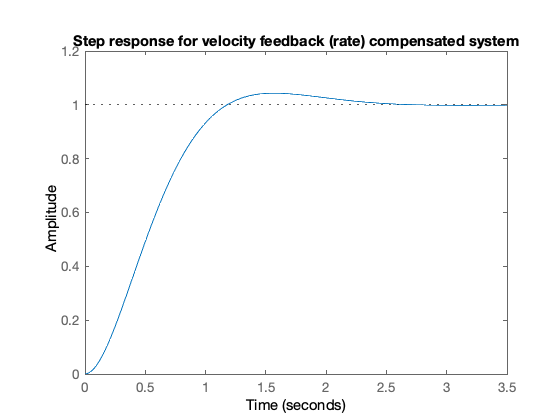

In [13]:
step(Gc2),title('Step response for velocity feedback (rate) compensated system')